In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

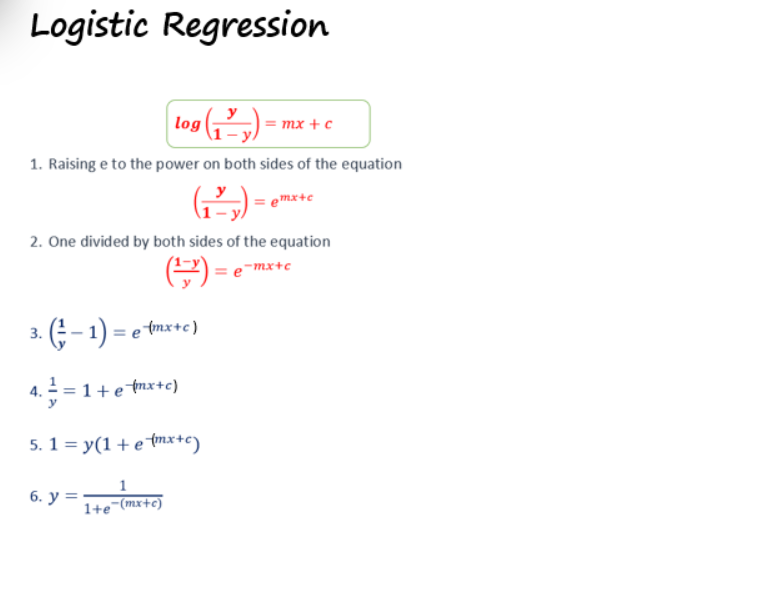

In [2]:
from IPython.display import Image
Image('logit.png')

In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


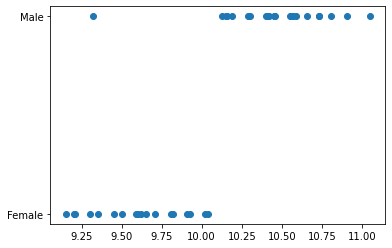

In [5]:
plt.scatter(df['size(cm)'], df['class(y)'])

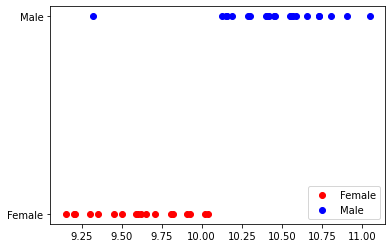

In [6]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()


In [7]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30)

In [11]:
xtrain.head()

,size(cm)
9,9.65
23,10.66
18,10.30
25,10.46
3,9.81


In [12]:
ytrain.head()

9     0
23    1
18    1
25    1
3     0
Name: class(y), dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
reg = LogisticRegression()

In [15]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
reg.coef_

array([[2.10919289]])

In [17]:
reg.intercept_

array([-20.7894403])

In [18]:
reg.predict_proba(xtest)

array([[0.79637235, 0.20362765],
       [0.3452557 , 0.6547443 ],
       [0.47186444, 0.52813556],
       [0.18487876, 0.81512124],
       [0.8161271 , 0.1838729 ],
       [0.6222254 , 0.3777746 ],
       [0.57668445, 0.42331555],
       [0.67963781, 0.32036219],
       [0.2224189 , 0.7775811 ],
       [0.17553266, 0.82446734],
       [0.46136589, 0.53863411],
       [0.13679138, 0.86320862]])

In [19]:
reg.predict(xtest)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [20]:
ytest

36    0
34    1
31    0
37    1
5     0
24    0
8     0
0     0
28    1
19    1
17    0
29    1
Name: class(y), dtype: int64

In [21]:
logit = reg.score(xtest, ytest)
logit

0.8333333333333334

# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [24]:
neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [25]:
neighbor=neigh.score(xtest,ytest)
neighbor

1.0

# Dataframe of algorithm accuracy

In [26]:
acu_vis={
    'algorithm':['Logistic Regression','KNN Classification'],
    'accuracy':[0.9166666666666666,1]
}

In [27]:
accuracy_df=pd.DataFrame(acu_vis)
accuracy_df

,algorithm,accuracy
0,Logistic Regression,0.916667
1,KNN Classification,1.000000


# Algorithm accuracy Comparison

In [28]:
import seaborn as sns

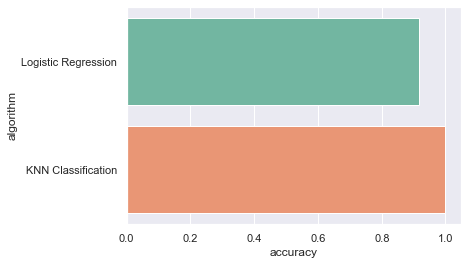

In [29]:
sns.set()
sns.barplot(y="algorithm",x='accuracy',data=accuracy_df,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})